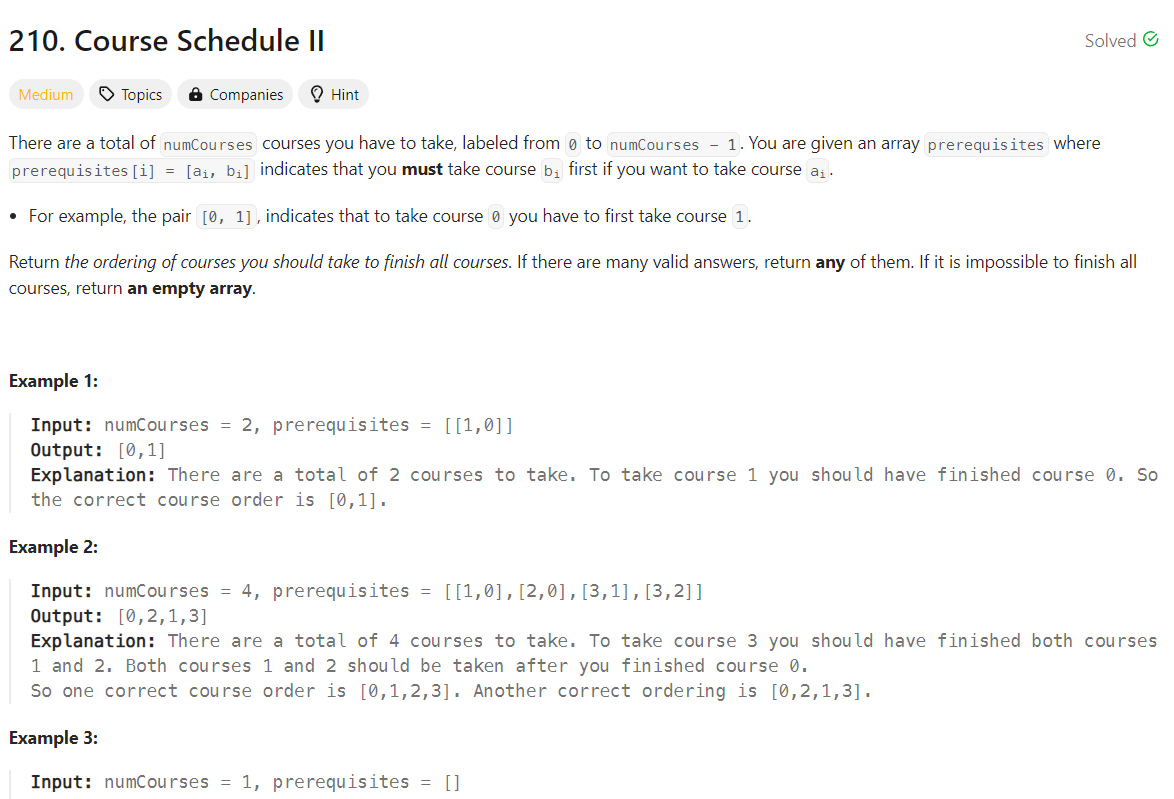

In [ ]:
from collections import defaultdict 
class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        prerequisitesMap = defaultdict(list)
        for course, prerequisite in prerequisites:
            prerequisitesMap[course].append(prerequisite) # Create prereq map

        result = []
        safeToTake = set()
        def dfs(course, seen=set()): # Not the best practice to use mutable (set) as a default arument
            nonlocal prerequisitesMap, safeToTake, result
            if course in safeToTake: # I already know this course is safe
                return True
            if course in seen: # Loop is detected
                return False
            
            # Check its prereqs
            seen.add(course)
            if all(dfs(prereq) for prereq in prerequisitesMap[course]):
                safeToTake.add(course)
                result.append(course)
                return True
            return False

        if all(dfs(course) for course in range(numCourses)):
            return result
        else:
            return []